## DATE - 1/11/2023
## PHASE - V
## TEAM ID - 696
## PROJECT TITLE - House Pricing forecasting using ML

## Importing Dependencies

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import tkinter as tk
import random
import requests
import scipy
import xgboost as xgb

## Loading Dataset

In [3]:
dataset = pd.read_csv("USA_Housing.csv")

## Data importing

In [4]:
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
dataset.head(6)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [163]:
import pandas as pd
first_row = dataset.iloc[0] 
specific_row = dataset.iloc[5]  
print("First row:")
print(first_row)

print("\nSpecific row:")
print(specific_row)


First row:
Avg. Area Income                                                     79545.458574
Avg. Area House Age                                                      5.682861
Avg. Area Number of Rooms                                                7.009188
Avg. Area Number of Bedrooms                                                 4.09
Area Population                                                      23086.800503
Price                                                               1059033.55787
Address                         208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
Name: 0, dtype: object

Specific row:
Avg. Area Income                                                     80175.754159
Avg. Area House Age                                                      4.988408
Avg. Area Number of Rooms                                                6.104512
Avg. Area Number of Bedrooms                                                 4.04
Area Population                                  

## Pre-Processing and Visualisation of Data

<Axes: xlabel='Price', ylabel='Count'>

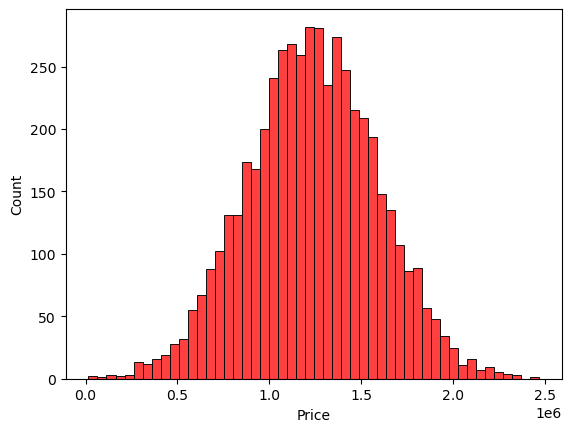

In [9]:
sns.histplot(dataset, x='Price', bins=50, color='r')

<Axes: xlabel='Count', ylabel='Avg. Area Income'>

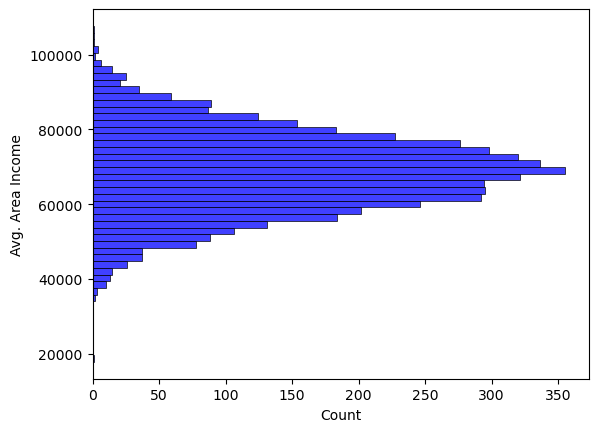

In [10]:
sns.histplot(dataset, y='Avg. Area Income', bins=50, color='b')

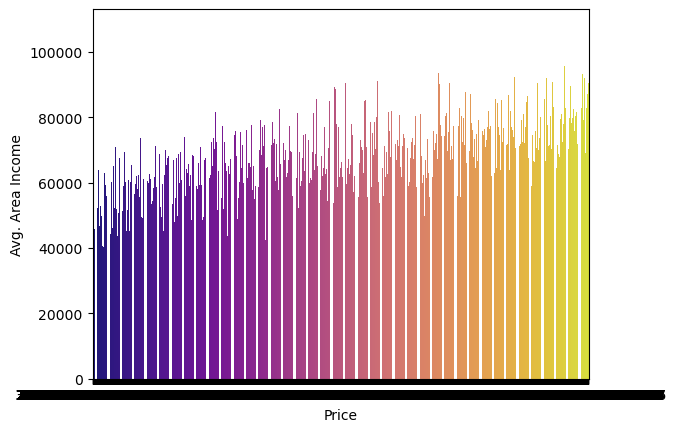

In [12]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("USA_Housing.csv")
sns.barplot(x='Price', y='Avg. Area Income', data=dataset, palette='plasma')
plt.show()

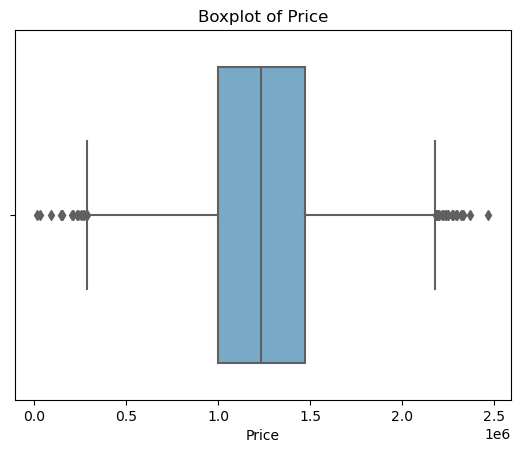

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset, x='Price', palette='Blues')
plt.xlabel('Price')
plt.title('Boxplot of Price')

plt.show()


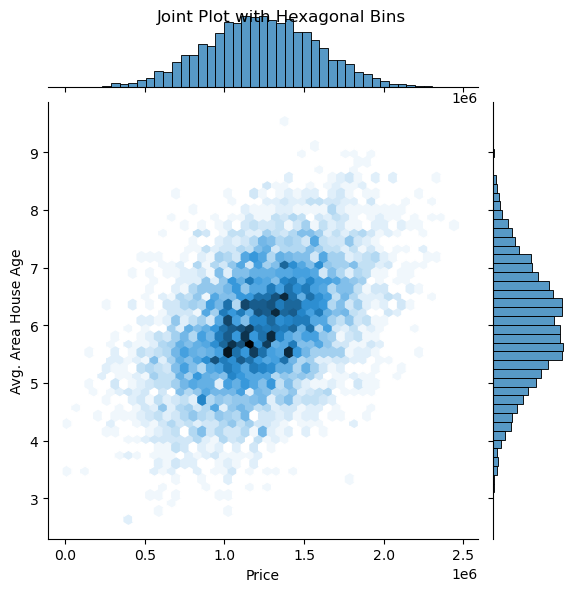

In [13]:
import pandas as pd
import seaborn as sns
dataset = pd.read_csv("USA_Housing.csv")
import matplotlib.pyplot as plt

sns.jointplot(data=dataset, x='Price', y='Avg. Area House Age', kind='hex')
plt.xlabel('Price')
plt.ylabel('Avg. Area House Age')
plt.suptitle('Joint Plot with Hexagonal Bins')

plt.show()

    

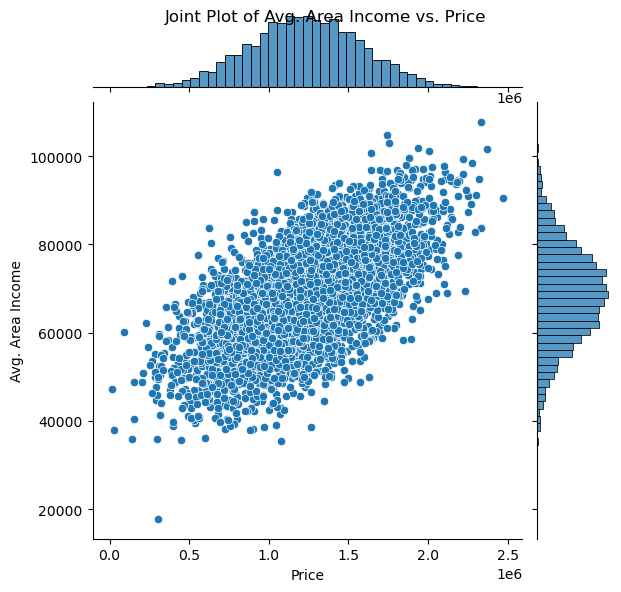

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(data=dataset, x='Price', y='Avg. Area Income')
plt.xlabel('Price')
plt.ylabel('Avg. Area Income')
plt.suptitle('Joint Plot of Avg. Area Income vs. Price')
plt.show()


array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

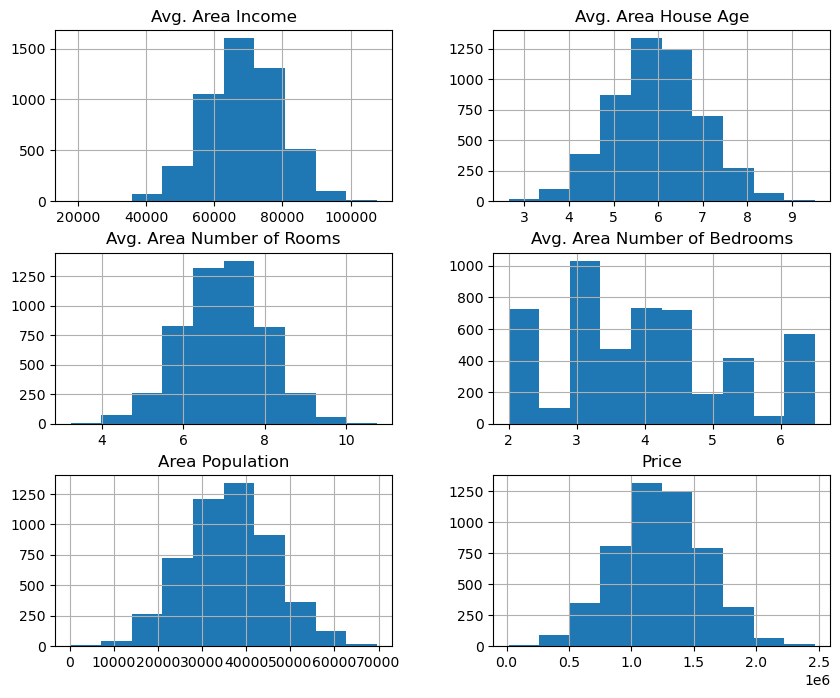

In [15]:
dataset.hist(figsize=(10,8))

## Visualising Correlation 

In [130]:
dataset = dataset.select_dtypes(include=[np.number])
correlation_matrix = dataset.corr()


In [17]:
dataset.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [18]:
import pandas as pd
dataset = pd.read_csv("USA_Housing.csv")

numeric_columns = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)



                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<Axes: >

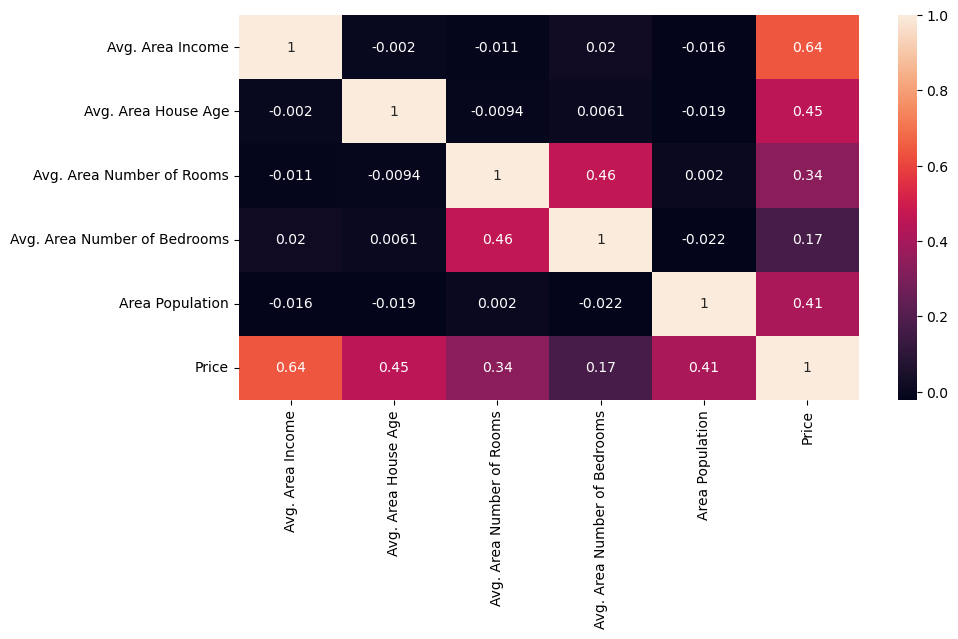

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)

<Figure size 1200x800 with 0 Axes>

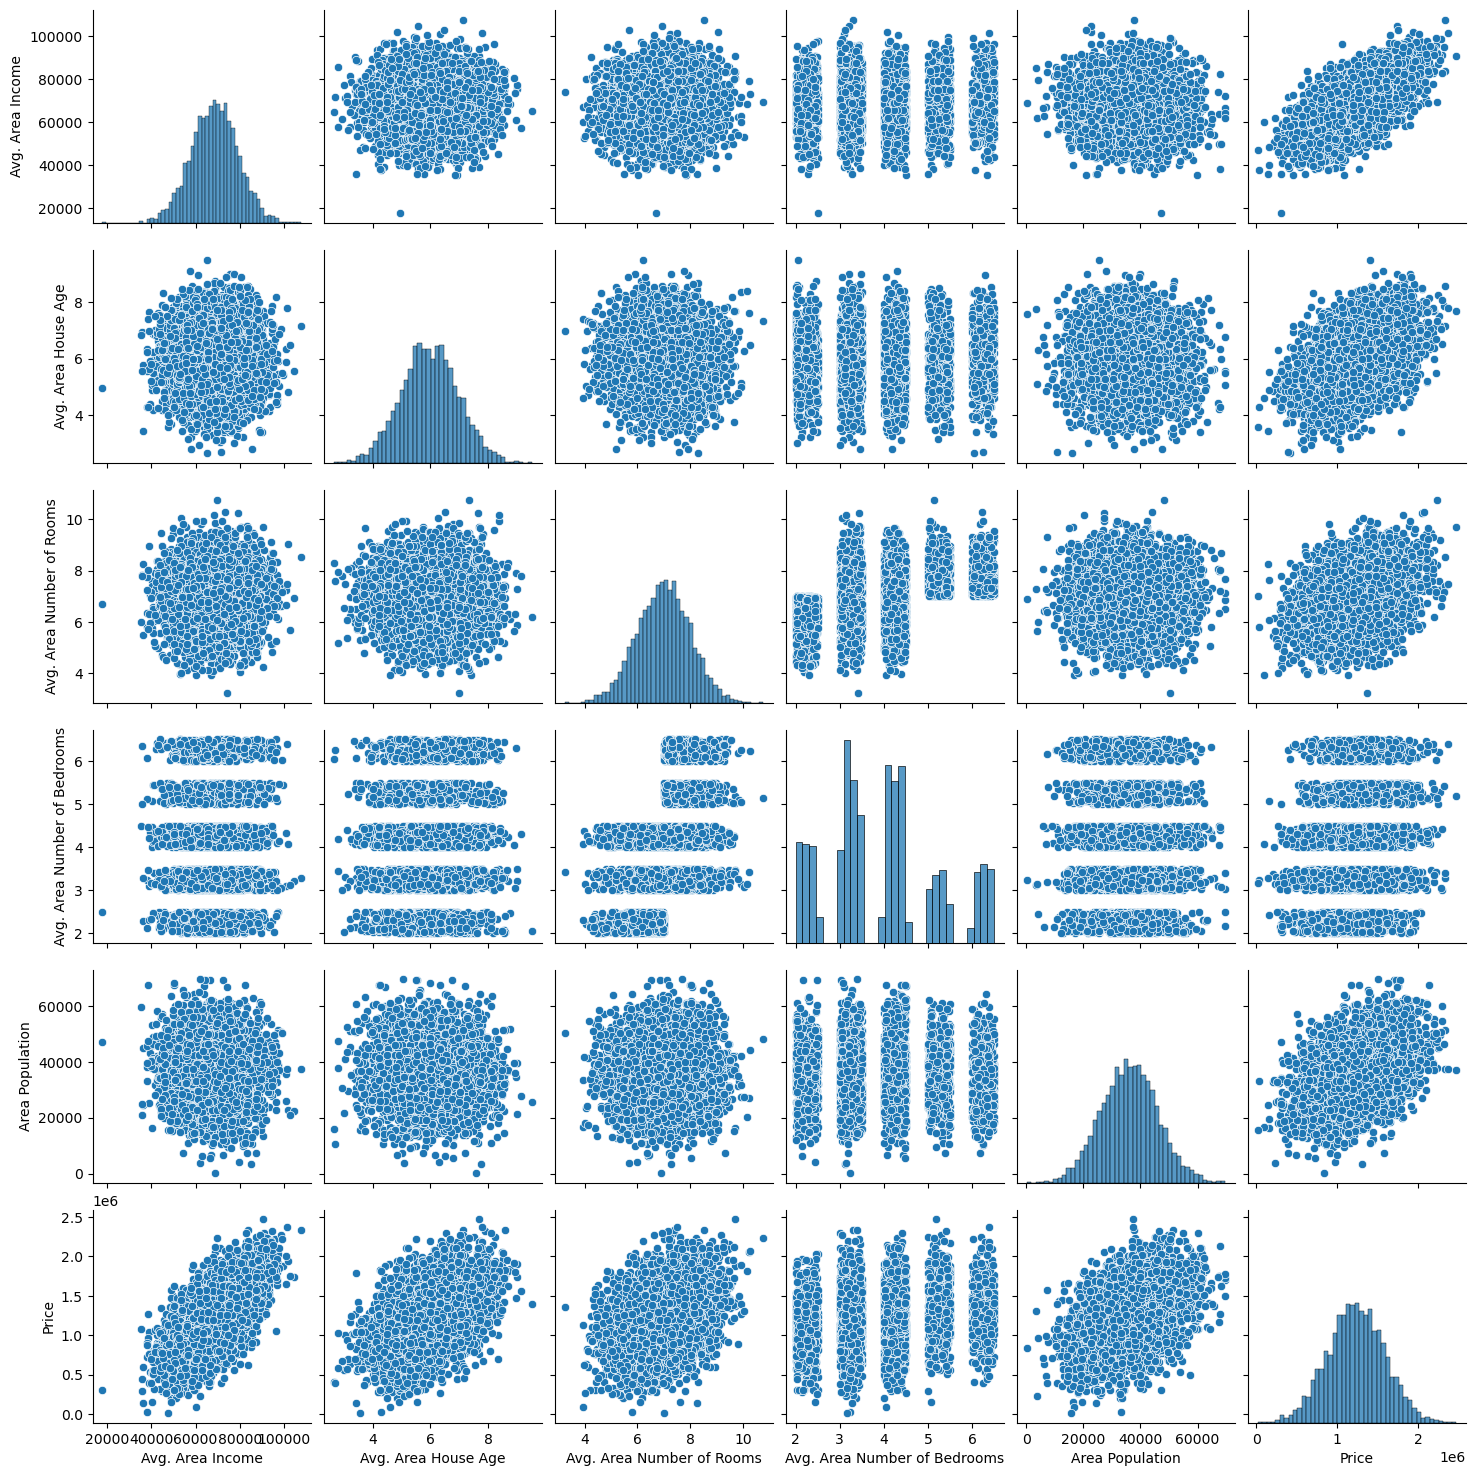

In [69]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)

In [70]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [145]:
## importing modules

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Dividing Data

In [28]:
X = dataset['Price']
Y = dataset[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]


# TRAINING PHASE

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


In [16]:
Y_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297


In [17]:
Y_train.shape

(4000, 5)

# TESTING PHASE

In [18]:
Y_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049


In [19]:
Y_test.shape

(1000, 5)

# Standardizing the data

In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_train_reshaped = X_train.to_numpy().reshape(-1, 1)
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)
X_train_scal = sc.fit_transform(X_train_reshaped)
X_test_scal = sc.transform(X_test_reshaped)



# Model Building and Evaluation
## Model 1 - Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()


In [25]:
model_lr.fit(X_train_scal, Y_train)

LinearRegression()

## Predicting Prices

In [26]:
Prediction1 = model_lr.predict(X_test_scal)


## Evaluation of Predicted Data

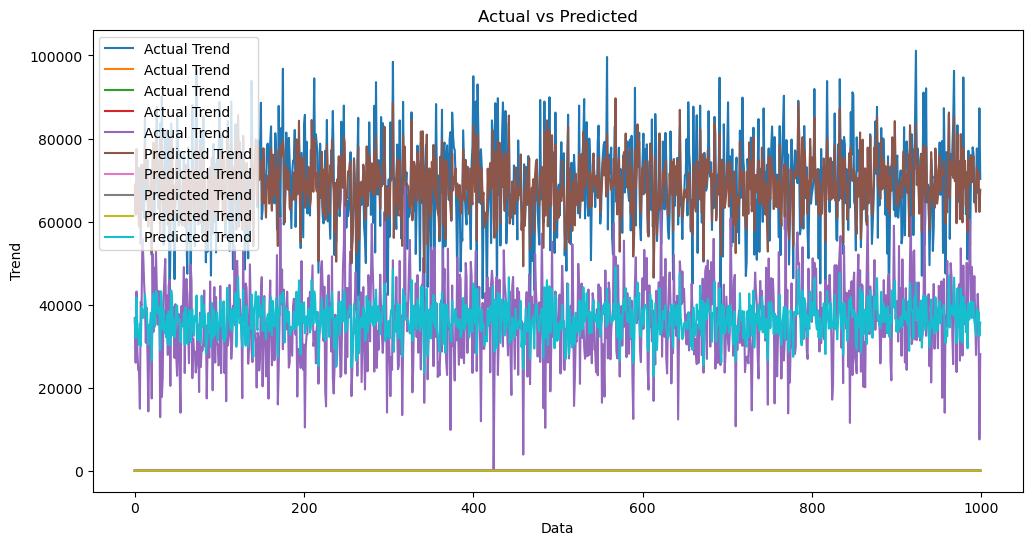

In [38]:
import matplotlib.pyplot as plt
import numpy as np
if len(Y_test) == len(Prediction1):
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Prediction1)), Prediction1, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')
else:
    print("Lengths of Y_test and Prediction1 do not match.")


<Axes: ylabel='Count'>

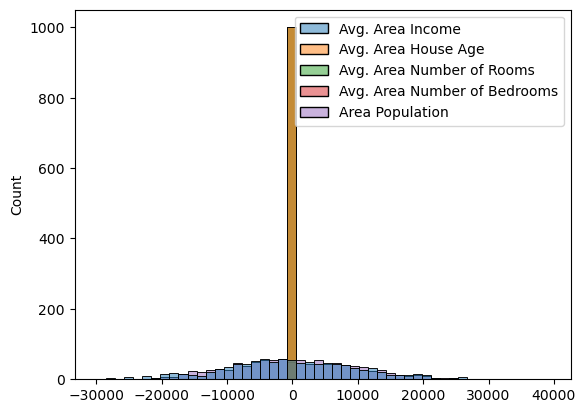

In [27]:
sns.histplot((Y_test-Prediction1), bins=50,color='r')

In [40]:
print(r2_score(Y_test, Prediction1))
print(mean_absolute_error(Y_test, Prediction1))
print(mean_squared_error(Y_test, Prediction1))

0.1866240420321335
2752.0362321666653
30247095.384854764


In [76]:
import numpy as np

# Assuming X_train is a Pandas Series
X_train_reshaped = X_train.values.reshape(-1, 1)

# Then, proceed with fitting the model using the reshaped data
model_lr.fit(X_train_reshaped, Y_train)



LinearRegression()

In [78]:
print(model_lr.intercept_)


[4.47830789e+04 4.44480736e+00 5.81749836e+00 3.23285804e+00
 2.17417850e+04]


<Axes: xlabel='Price', ylabel='Density'>

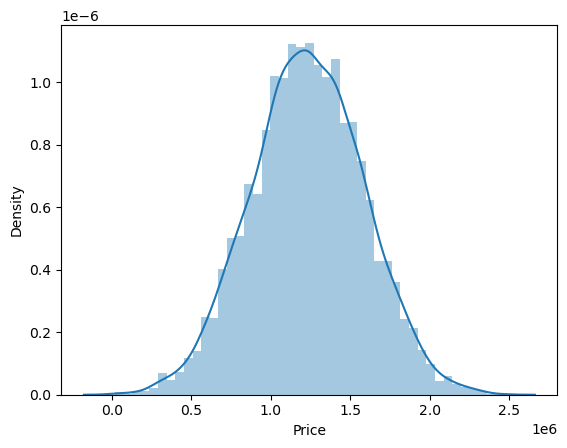

In [79]:
sns.distplot(dataset["Price"])

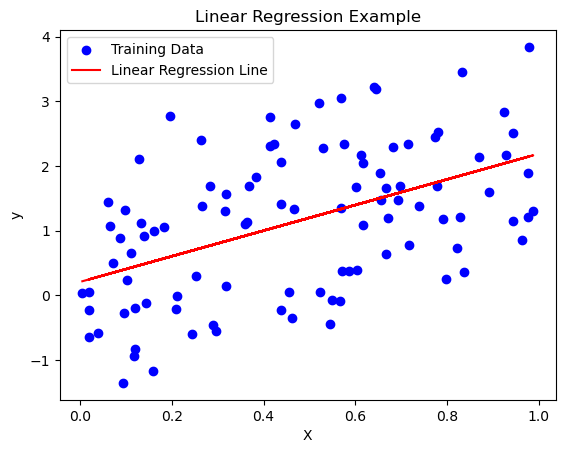

In [142]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X.squeeze() + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Making predictions on the test set
predictions = lm.predict(X_test)

# Plotting the training data and the linear regression line
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, lm.predict(X), color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()




In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = np.random.rand(100, 1)  # Feature
y = 2 * X.squeeze() + np.random.randn(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Creating a DataFrame with coefficients
coeff_df = pd.DataFrame(lm.coef_, columns=['Coefficient'])
print(coeff_df)


   Coefficient
0     1.980518


## Model 2 - Support Vector Regressor

In [42]:
model_svr = SVR()

In [43]:
import numpy as np
Y_train_array = Y_train.to_numpy()


In [44]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
base_model = SVR(kernel='linear', C=1.0)

# Wrap it with MultiOutputRegressor
model_svr = MultiOutputRegressor(base_model)
model_svr.fit(X_train_scal, Y_train)


MultiOutputRegressor(estimator=SVR(kernel='linear'))

## Predicting Prices

In [46]:
Prediction2 = model_svr.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

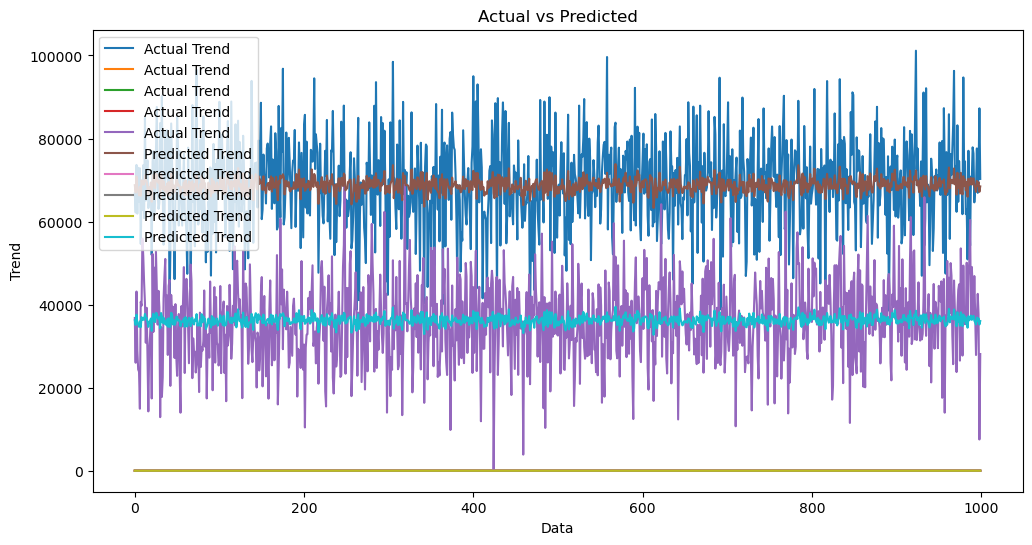

In [47]:
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction2, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: ylabel='Count'>

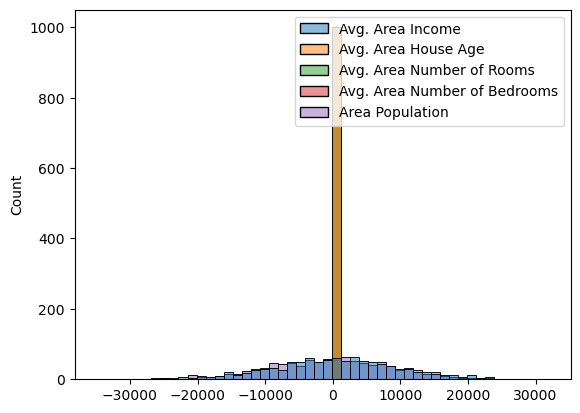

In [48]:
sns.histplot((Y_test-Prediction2), bins=50)

In [49]:
print(r2_score(Y_test, Prediction2))
print(mean_absolute_error(Y_test, Prediction2))
print(mean_squared_error(Y_test, Prediction2))

0.12092808540883056
3048.284745891538
37172622.89729237


In [157]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Creating a DataFrame with coefficients
coeff_df = pd.DataFrame(lm.coef_, columns=['Coefficient'])
print(coeff_df)

   Coefficient
0     1.980518


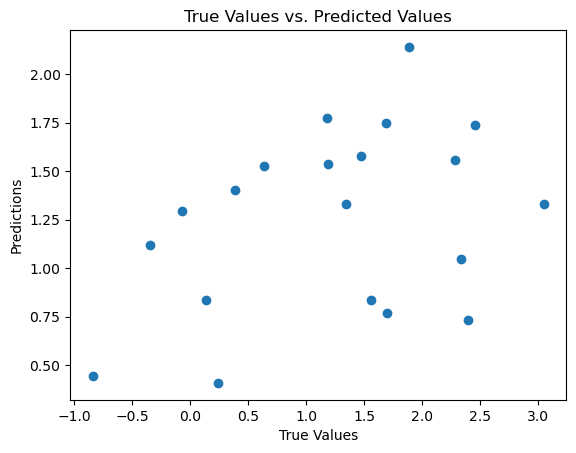

In [156]:
import matplotlib.pyplot as plt

# Scatter plot of true test values vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')
plt.show()


## Model 3 - Lasso Regression

In [51]:
model_lar = Lasso(alpha=1)

In [52]:
model_lar.fit(X_train_scal,Y_train)

Lasso(alpha=1)

## Predicting Prices

In [54]:
Prediction3 = model_lar.predict(X_test_scal)

## Evaluation of Predicted Data

Text(0.5, 1.0, 'Actual vs Predicted')

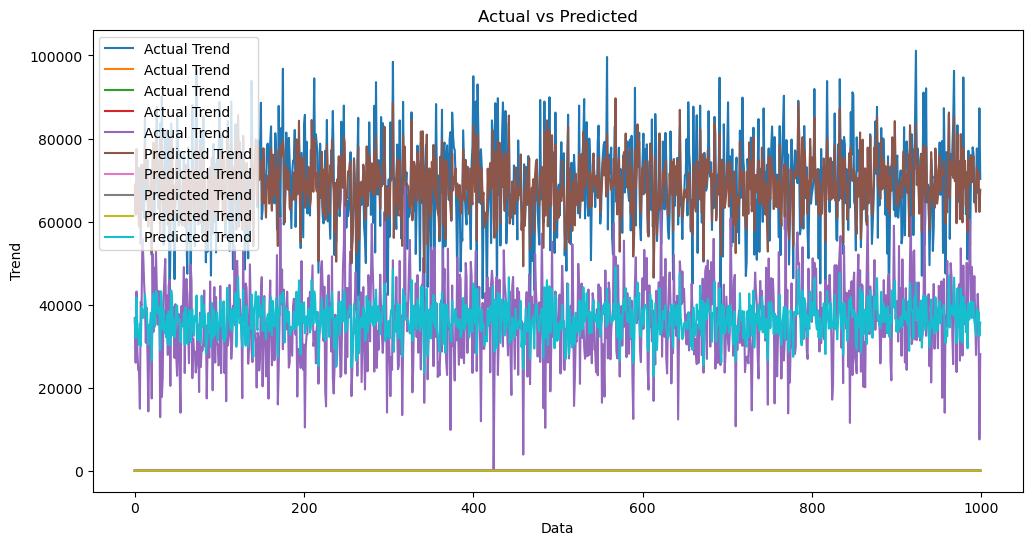

In [56]:
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction1, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: ylabel='Count'>

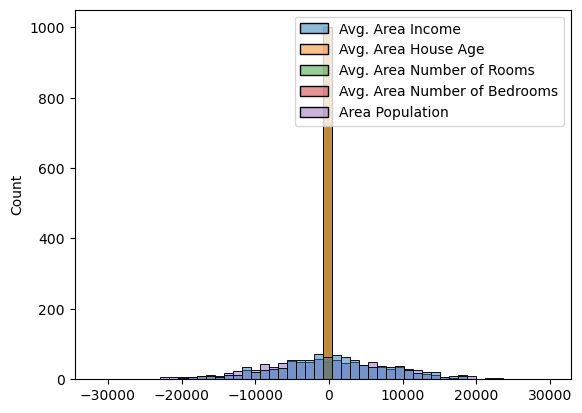

In [57]:
sns.histplot((Y_test-Prediction3), bins=50)

In [58]:
print(r2_score(Y_test, Prediction2))
print(mean_absolute_error(Y_test, Prediction2))
print(mean_squared_error(Y_test, Prediction2))

0.12092808540883056
3048.284745891538
37172622.89729237


## Model 4 - Random Forest Regressor

In [60]:
model_rf = RandomForestRegressor(n_estimators=50)

In [61]:
model_rf.fit(X_train_scal, Y_train)

RandomForestRegressor(n_estimators=50)

## Predicting Prices

In [63]:
Prediction4 = model_rf.predict(X_test_scal)

## Evaluation of Predicted Data

Text(0.5, 1.0, 'Actual vs Predicted')

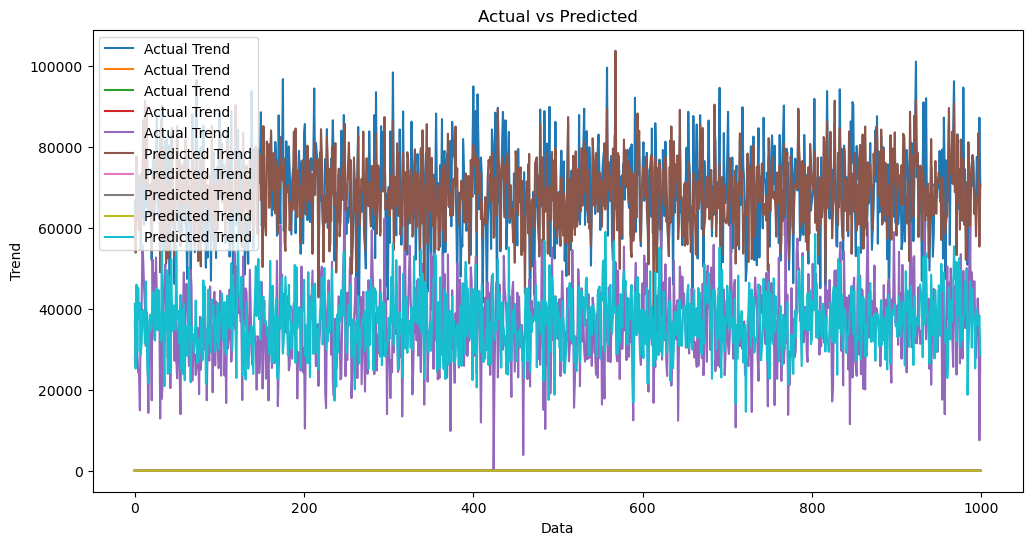

In [65]:
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction4, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: ylabel='Count'>

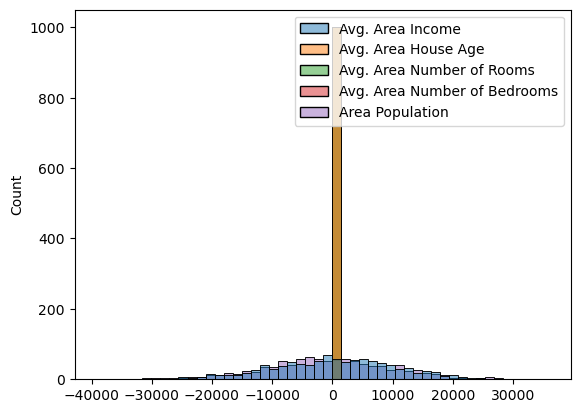

In [66]:
sns.histplot((Y_test-Prediction4), bins=50)

In [67]:
print(r2_score(Y_test, Prediction3))
print(mean_absolute_error(Y_test, Prediction2))
print(mean_squared_error(Y_test, Prediction2))

0.11034396748383535
3048.284745891538
37172622.89729237


##  Model 5 - XGboost Regressor

In [40]:
import xgboost as xgb
model_xg = xgb.XGBRegressor()


In [43]:
model_xg.fit(X_train_scal, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
Prediction5 = model_xg.predict(X_test_scal)

Text(0.5, 1.0, 'Actual vs Predicted')

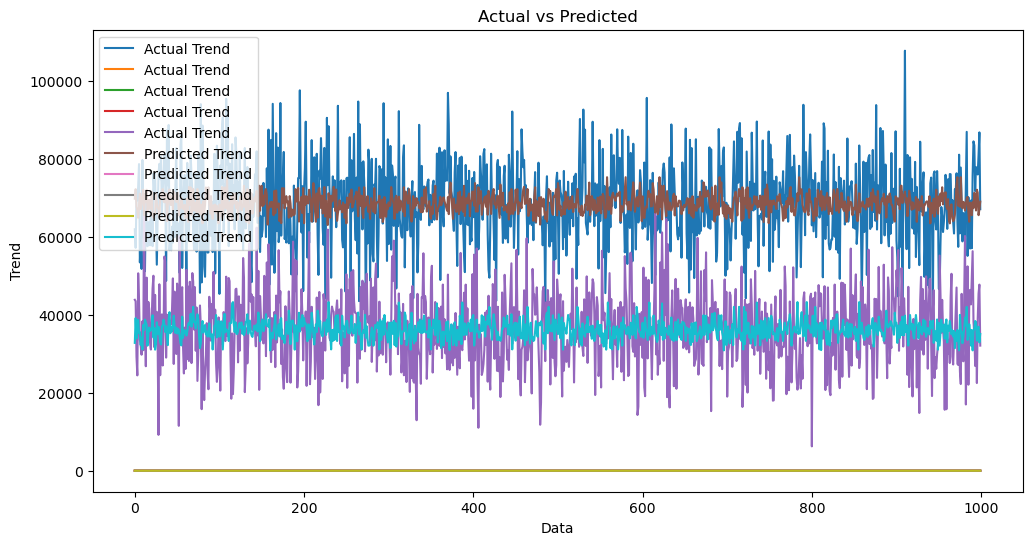

In [49]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(Y_test)),Y_test, label='Actual Trend')
plt.plot(np.arange(len(Y_test)), Prediction5, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs Predicted')

<Axes: ylabel='Count'>

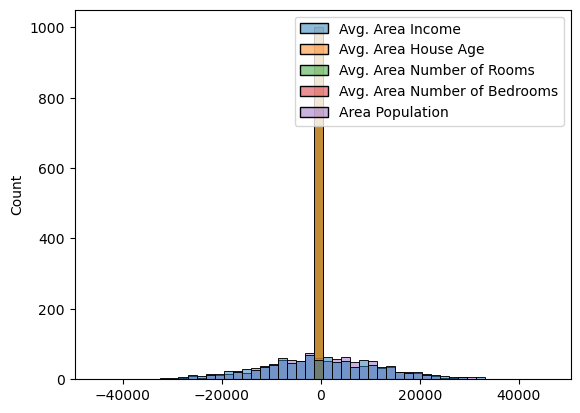

In [57]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

model_rf = RandomForestRegressor(n_estimators=50)

model_rf.fit(X_train_scal, Y_train)

Prediction4 = model_rf.predict(X_test_scal)

sns.histplot((Y_test - Prediction4), bins=50)


In [59]:
print(r2_score(Y_test, Prediction4))
print(mean_absolute_error(Y_test, Prediction4))
print(mean_squared_error(Y_test, Prediction4))

-0.5226451361252911
3929.0429959545772
61023936.73108288


## On consider the of all the model output
## Model 1 - Linear Regression has the more accuracy data prediction

## we had predicted the data next accessing the data 

In [167]:
income_value = dataset.at[0, 'Avg. Area Income']
population_value = dataset.at[2, 'Area Population']
price_value = dataset.at[3, 'Price']
rooms_value = dataset.at[1, 'Avg. Area Number of Rooms']
Bedroom_value = dataset.at[4,'Avg. Area Number of Bedrooms']



In [164]:
income_value

79545.45857431678

In [165]:
population_value 

36882.15939970458

In [96]:
price_value

1260616.8066294468

In [166]:
rooms_value 

6.730821019094919

In [168]:
Bedroom_value

4.23

## Average Price

In [99]:
import numpy as np
import pandas as pd  
dataset = pd.read_csv("USA_Housing.csv")

average_price = dataset['Price'].mean()
print("Average Price:", average_price)

Average Price: 1232072.654142357


## Accuracy score

In [100]:
from sklearn.metrics import accuracy_score



In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

dataset = pd.read_csv('USA_Housing.csv')

X = dataset.drop(columns=['Price', 'Address'])
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create and train a machine learning model (RandomForestRegressor) using X_train and y_train
model = RandomForestRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print or use the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 15010250912.2045
R-squared (R2) Score: 0.8828507619666764


In [136]:
!pip install basemap

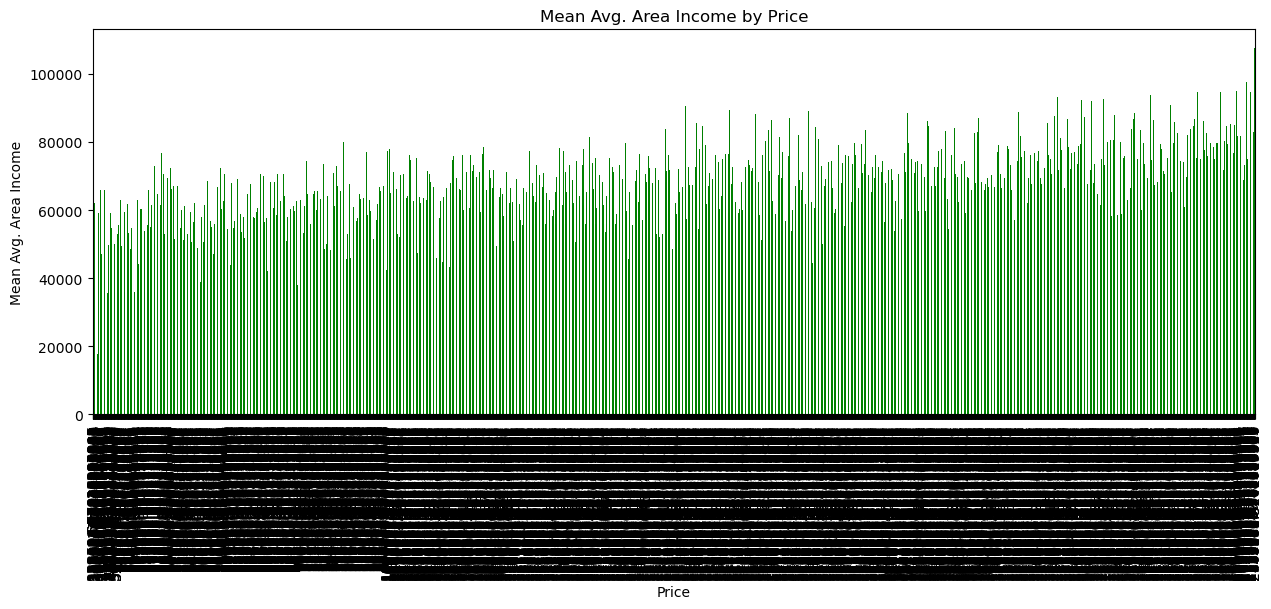

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
bar_graph = dataset.groupby('Price')['Avg. Area Income'].mean()
bar_graph.plot(kind='bar', color='Green')
plt.xlabel('Price')
plt.ylabel('Mean Avg. Area Income')
plt.title('Mean Avg. Area Income by Price')
plt.show()


In [113]:
len(X_test)

1000

In [114]:
len(Y_test)

1000

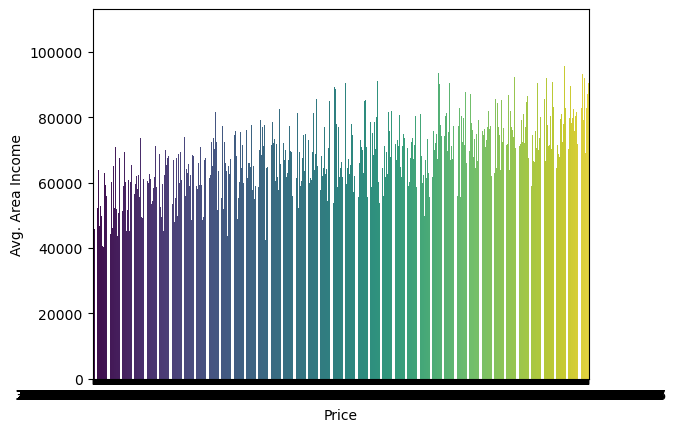

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("USA_Housing.csv")

# Extracting the data

X = dataset['Price']
Y = dataset['Avg. Area Income']

sns.barplot(x=X, y=Y, data=dataset, palette='viridis')
plt.show()


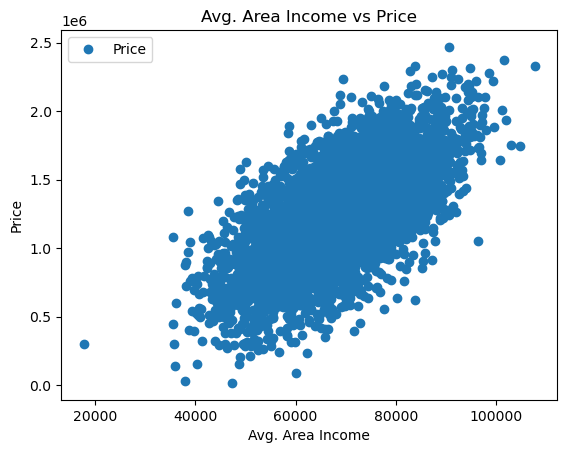

In [7]:

df = pd.DataFrame(dataset)
df.plot(x='Avg. Area Income', y='Price', style='o')
plt.title('Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.show()

## GEOCODE TO PREDECTION THE LOCATION OF THE DATASET

In [104]:
from mpl_toolkits.basemap import Basemap

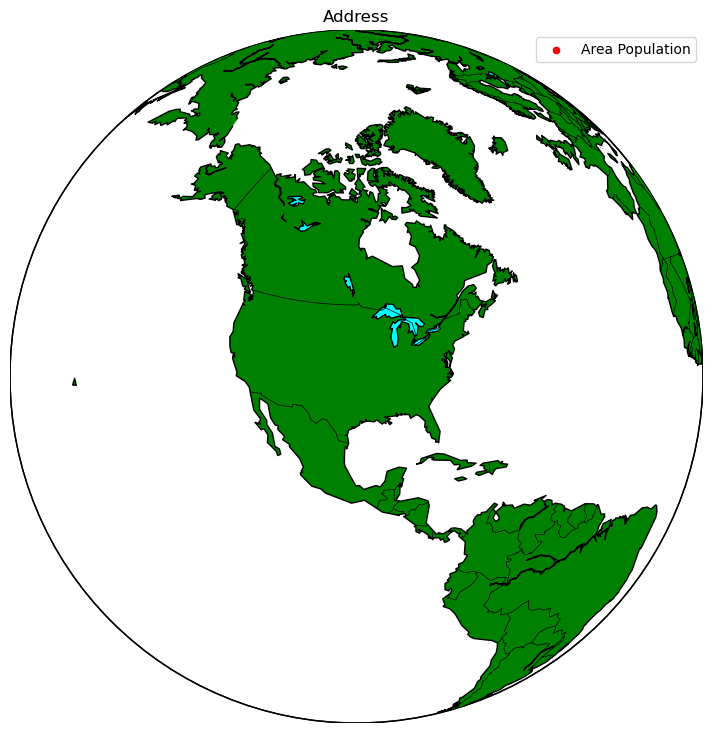

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Creating a Basemap object
map = Basemap(projection='ortho', lat_0=37.09024, lon_0=-95.712891)

x =0
    
y =0


Area_Population = dataset.at[2, 'Area Population']

fig = plt.figure(figsize=(12, 9))
plt.title("Address")
map.scatter(x, y, s=20, color='red', label='Area Population')
map.fillcontinents(color='green', lake_color='aqua')
map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()

plt.legend()
plt.show()

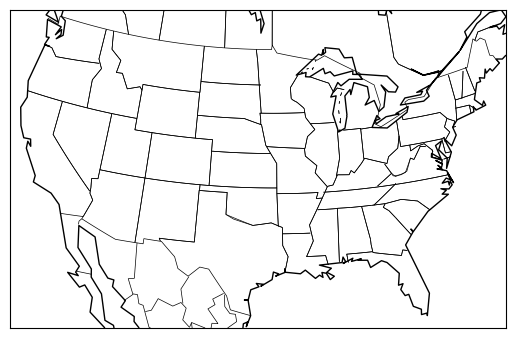

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
              projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

map.drawcoastlines()
map.drawcountries()
map.drawstates()

plt.show()


## Finding  the longitude and latitude

In [3]:
import requests

def get_geocode(address):
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": address,
        "format": "json"
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data:
            latitude = data[0]["lat"]
            longitude = data[0]["lon"]
            return latitude, longitude
        else:
            return None
    else:
        return None

# List of addresses
addresses = [
    "1600 Amphitheatre Parkway, Mountain View, CA",
    "Statue of Liberty, New York, NY",
    "Big Ben, London, UK",
    "Eiffel Tower, Paris, France",
    "Sydney Opera House, Sydney, Australia",
    "Taj Mahal, Agra, India",
    "Red Square, Moscow, Russia",
    "Great Wall of China, Beijing, China",
    "Colosseum, Rome, Italy",
    "Christ the Redeemer, Rio de Janeiro, Brazil"
]
for address in addresses[:10]:
    geocode_result = get_geocode(address)
    
    if geocode_result:
        latitude, longitude = geocode_result
        print(f"Address: {address}, Latitude: {latitude}, Longitude: {longitude}")
    else:
        print(f"Address: {address} - Not found or request failed")


Address: 1600 Amphitheatre Parkway, Mountain View, CA, Latitude: 37.42248575, Longitude: -122.08558456613565
Address: Statue of Liberty, New York, NY, Latitude: 40.689253199999996, Longitude: -74.04454817144321
Address: Big Ben, London, UK, Latitude: 51.5007042, Longitude: -0.1245721
Address: Eiffel Tower, Paris, France, Latitude: 48.8582599, Longitude: 2.2945006358633115
Address: Sydney Opera House, Sydney, Australia, Latitude: -33.85719805, Longitude: 151.21512338473752
Address: Taj Mahal, Agra, India, Latitude: 27.1750075, Longitude: 78.04210126365584
Address: Red Square, Moscow, Russia, Latitude: 55.7535926, Longitude: 37.62148935239179
Address: Great Wall of China, Beijing, China, Latitude: 40.3572606, Longitude: 116.0127857
Address: Colosseum, Rome, Italy, Latitude: 41.8902614, Longitude: 12.493087103595503
Address: Christ the Redeemer, Rio de Janeiro, Brazil, Latitude: -22.9519173, Longitude: -43.2104585


## MAPPING

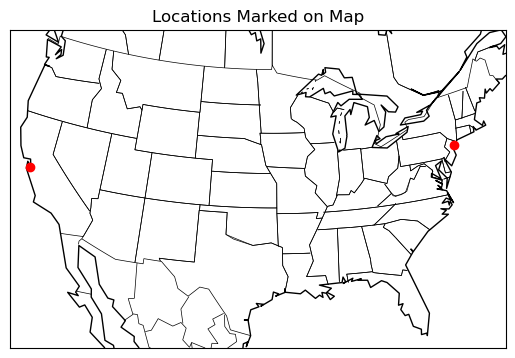

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

map = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49,
              projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

map.drawcoastlines()
map.drawcountries()
map.drawstates()

geolocator = Nominatim(user_agent="location_marking")

locations = [
    "1600 Amphitheatre Parkway, Mountain View, CA",
    "Statue of Liberty, New York, NY",
    "Big Ben, London, UK",
    "Eiffel Tower, Paris, France",
    "Sydney Opera House, Sydney, Australia",
    "Taj Mahal, Agra, India",
    "Red Square, Moscow, Russia",
    "Great Wall of China, Beijing, China",
    "Colosseum, Rome, Italy",
    "Christ the Redeemer, Rio de Janeiro, Brazil"
]

for location in locations:
   
    loc = geolocator.geocode(location)
    if loc:
        lon, lat = loc.longitude, loc.latitude
        x, y = map(lon, lat)
        map.plot(x, y, 'ro', markersize=6)  
plt.title("Locations Marked on Map")
plt.show()


## Actual vs predicted data 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(dataset)


X = df[['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']]
y = df['Price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

[-1063467.32402954]
[[ 2.13266585e+01  1.20329989e+05 -1.15274864e+03]]


,Actual,Predicted
0,1.022781e+06,9.116918e+05
1,9.801458e+05,1.119405e+06
2,1.416648e+06,1.463333e+06
3,1.047227e+06,9.662088e+05
4,1.253434e+06,1.300671e+06
...,...,...
995,1.443817e+06,1.152375e+06
996,1.810158e+06,1.613449e+06
997,9.480540e+05,1.082303e+06
998,1.677612e+06,1.495034e+06


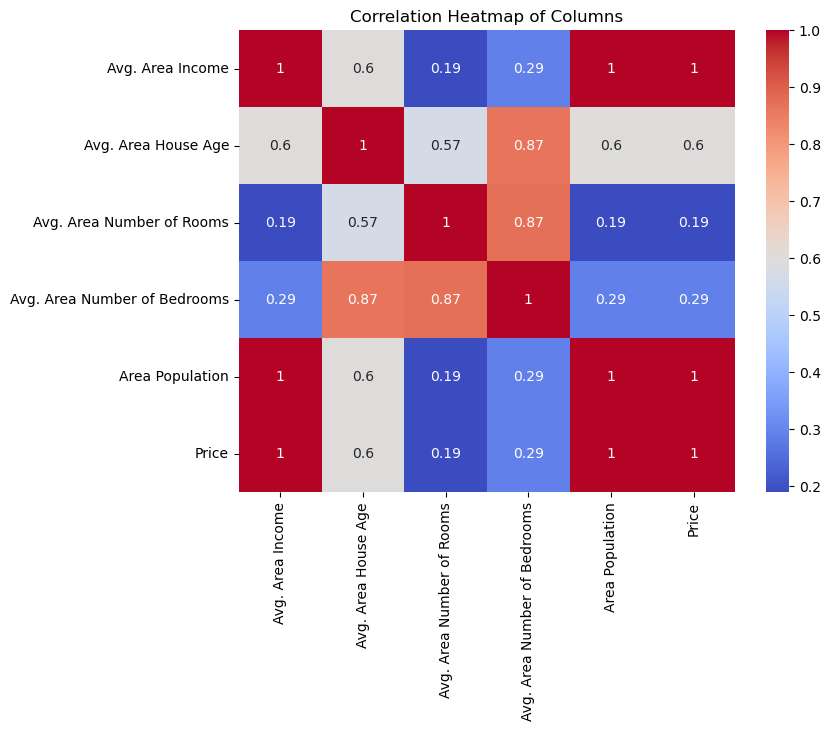

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset (replace it with your actual dataset)
data = {
    'Avg. Area Income': [100000, 110000, 120000, 130000, 140000],
    'Avg. Area House Age': [5, 8, 7, 6, 9],
    'Avg. Area Number of Rooms': [6, 7, 8, 6, 7],
    'Avg. Area Number of Bedrooms': [3, 4, 4, 3, 4],
    'Area Population': [5000, 6000, 7000, 8000, 9000],
    'Price': [550000, 600000, 650000, 700000, 750000]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Columns')
plt.show()


## ACTUAL PREDICTED 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(data)

X = df[['Avg. Area Income', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']]
y = df['Price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

[50000.]
[[ 5.00000000e+00 -3.83476637e-12 -3.83476637e-12]]


,Actual,Predicted
0,650000,650000.0


## USING PICKEL LISTING THE DATA

In [31]:
import pickle

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [32]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [40]:
import pandas as pd

address = pd.read_csv('USA_Housing.csv') 

list_address = address[['Address', 'Price']].iloc[0:10].values.tolist()



In [41]:
list_address

[['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101', 1059033.5578701235],
 ['188 Johnson Views Suite 079\nLake Kathleen, CA 48958', 1505890.91484695],
 ['9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', 1058987.9878760849],
 ['USS Barnett\nFPO AP 44820', 1260616.8066294468],
 ['USNS Raymond\nFPO AE 09386', 630943.4893385402],
 ['06039 Jennifer Islands Apt. 443\nTracyport, KS 16077', 1068138.0743935304],
 ['4759 Daniel Shoals Suite 442\nNguyenburgh, CO 20247', 1502055.8173744078],
 ['972 Joyce Viaduct\nLake William, TN 17778-6483', 1573936.5644777217],
 ['USS Gilbert\nFPO AA 20957', 798869.5328331633],
 ['Unit 9446 Box 0958\nDPO AE 97025', 1545154.8126419624]]